#  Corona vaccine progress 

version 1.0 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out
* discussion about 

## Why is Sweden underperforming regarding reporting?
* Swedish FHM try to explain why they underperform see [discussion in Swedish](https://community.dataportal.se/topic/77/tillg%C3%A4nglighetsdirektivet-och-publicerade-%C3%B6ppna-data/3?_=1617769671095) 
  * email sent to ask FHM Sweden deliver data as data see [blogpost](https://minancestry.blogspot.com/2021/04/exempel-kommunikation-med-fhm-for-att.html)
* Sweden is nearly never presenting updated numbers and its not machinereadable see [list](https://github.com/salgo60/CoronaVaccinationCheck/blob/main/What%20is%20reported.ipynb)

### To do
* [Issue 11](https://github.com/salgo60/CoronaVaccinationCheck/issues/11)  redo and split number vaccinations / number people vaccinated.

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-05-17 13:46:42.400104


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Afghanistan,AFG,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",2021-05-11,World Health Organization,https://covid19.who.int/
1,Albania,ALB,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",2021-05-14,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Algeria,DZA,Sputnik V,2021-02-19,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
3,Andorra,AND,"Oxford/AstraZeneca, Pfizer/BioNTech",2021-05-10,Government of Andorra,https://www.govern.ad/covid19_newsletter/
4,Angola,AGO,Oxford/AstraZeneca,2021-05-12,World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...
206,Wales,OWID_WLS,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2021-05-15,Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
207,Wallis and Futuna,WLF,Oxford/AstraZeneca,2021-05-11,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
208,Yemen,YEM,Oxford/AstraZeneca,2021-05-09,World Health Organization,https://covid19.who.int/
209,Zambia,ZMB,Oxford/AstraZeneca,2021-05-15,Government of Zambia,https://www.facebook.com/mohzambia/posts/19088...


In [5]:
#order by last updated ascending
countries_csv = countries_csv.sort_values(by=['last_observation_date'],ascending=False)
#countries_csv.reindex(["location"])
countries_csv.reset_index(drop=True, inplace=True)
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Zimbabwe,ZWE,Sinopharm/Beijing,2021-05-16,Ministry of Health,https://twitter.com/MoHCCZim/status/1394026036...
1,Turkey,TUR,"Pfizer/BioNTech, Sinovac",2021-05-16,COVID-19 Vaccine Information Platform,https://covid19asi.saglik.gov.tr/
2,Cambodia,KHM,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac",2021-05-16,Ministry of Health,https://www.facebook.com/MinistryofHealthofCam...
3,Mexico,MEX,"CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, ...",2021-05-16,Secretary of Health,https://www.gob.mx/salud/prensa/198-actividad-...
4,Canada,CAN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2021-05-16,Official data from provinces via covid19tracke...,https://covid19tracker.ca/vaccinationtracker.html
...,...,...,...,...,...,...
206,Honduras,HND,"Moderna, Oxford/AstraZeneca",2021-04-09,Government of Honduras,https://proceso.hn/honduras-a-la-zaga-en-vacun...
207,Syria,SYR,Sputnik V,2021-04-08,Ministry of Health,http://www.xinhuanet.com/english/africa/2021-0...
208,Turkmenistan,TKM,"EpiVacCorona, Oxford/AstraZeneca, Sinopharm/Be...",2021-04-04,World Health Organization,https://covid19.who.int/
209,Sao Tome and Principe,STP,Oxford/AstraZeneca,2021-03-29,Ministry of Health,https://www.facebook.com/MSaudeSTeP/photos/pcb...


## Latest reported

In [6]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:20]

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
10630,Zimbabwe,2021-05-16,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1394026036...,796947.0,581615.0,215332.0,ZWE,Sinopharm/Beijing,2021-05-16,Ministry of Health,https://twitter.com/MoHCCZim/status/1394026036...,both
9034,South Korea,2021-05-16,"Oxford/AstraZeneca, Pfizer/BioNTech",http://ncv.kdca.go.kr/,4674151.0,3733806.0,940345.0,KOR,"Oxford/AstraZeneca, Pfizer/BioNTech",2021-05-16,Korea Centers for Disease Control and Prevention,http://ncv.kdca.go.kr/,both
7790,Qatar,2021-05-16,Pfizer/BioNTech,https://covid19.moph.gov.qa/EN/Pages/Vaccinati...,2035475.0,1190700.0,844775.0,QAT,Pfizer/BioNTech,2021-05-16,Ministry of Public Health,https://covid19.moph.gov.qa/EN/Pages/Vaccinati...,both
1320,Brazil,2021-05-16,"Pfizer/BioNTech, Oxford/AstraZeneca, Sinovac",https://qsprod.saude.gov.br/extensions/DEMAS_C...,52771668.0,35801333.0,16970335.0,BRA,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",2021-05-16,Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...,both
571,Azerbaijan,2021-05-16,"Oxford/AstraZeneca, Sinovac",https://koronavirusinfo.az,1795049.0,1030831.0,764218.0,AZE,"Oxford/AstraZeneca, Sinovac",2021-05-16,Government of Azerbaijan,https://koronavirusinfo.az,both
9430,Taiwan,2021-05-16,Oxford/AstraZeneca,https://www.cdc.gov.tw/Category/Page/9jFXNbCe-...,194678.0,NaN,NaN,TWN,Oxford/AstraZeneca,2021-05-16,Taiwan Centers for Disease Control,https://www.cdc.gov.tw/Category/Page/9jFXNbCe-...,both
5196,Latvia,2021-05-16,"Pfizer/BioNTech, Moderna, Oxford/AstraZeneca, ...",https://data.gov.lv/dati/eng/dataset/covid19-v...,503189.0,389036.0,116770.0,LVA,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",2021-05-16,National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...,both
2242,Curacao,2021-05-16,"Pfizer/BioNTech, Moderna",https://bakuna.cw/,123637.0,79747.0,43890.0,CUW,"Moderna, Pfizer/BioNTech",2021-05-16,Government of Curacao,https://bakuna.cw/,both
2269,Cyprus,2021-05-16,"Pfizer/BioNTech, Oxford/AstraZeneca, Johnson&J...",https://www.moh.gov.cy/moh/moh.nsf/All/0EFA027...,434550.0,325648.0,108902.0,CYP,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",2021-05-16,Ministry of Health,https://www.moh.gov.cy/moh/moh.nsf/All/0EFA027...,both
9835,Ukraine,2021-05-16,"Oxford/AstraZeneca, Sinovac, Pfizer/BioNTech",https://vaccination.covid19.gov.ua/,958552.0,940158.0,18394.0,UKR,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",2021-05-16,Ministry of Health,https://vaccination.covid19.gov.ua/,both


In [7]:
#Countries in list
allCountries["location"].value_counts()

Norway           163
Canada           154
Israel           149
Chile            143
Liechtenstein    141
                ... 
Turkmenistan       1
Tajikistan         1
Guinea-Bissau      1
Tuvalu             1
Yemen              1
Name: location, Length: 212, dtype: int64

In [8]:
allCountries.groupby(["location", "vaccine"]).size()

location           vaccine                                                
Afghanistan        Oxford/AstraZeneca                                          5
                   Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing      1
Albania            Oxford/AstraZeneca, Pfizer/BioNTech                         5
                   Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V    43
                   Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V              2
                                                                              ..
Wales              Pfizer/BioNTech                                             1
Wallis and Futuna  Oxford/AstraZeneca                                          8
Yemen              Oxford/AstraZeneca                                          1
Zambia             Oxford/AstraZeneca                                         21
Zimbabwe           Sinopharm/Beijing                                          85
Length: 374, dtype: int64

In [9]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10630
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 10127 non-null  object        
 1   date                     10127 non-null  datetime64[ns]
 2   vaccine                  10127 non-null  object        
 3   source_url               10127 non-null  object        
 4   total_vaccinations       10038 non-null  float64       
 5   people_vaccinated        9293 non-null   float64       
 6   people_fully_vaccinated  8010 non-null   float64       
 7   iso_code                 10125 non-null  object        
 8   vaccines                 10125 non-null  object        
 9   last_observation_date    10125 non-null  object        
 10  source_name              10125 non-null  object        
 11  source_website           10125 non-null  object        
 12  _merge                   10127 n

In [10]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','people_vaccinated','people_fully_vaccinated','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
worldfully_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["people_fully_vaccinated"]).replace(',', ' ')
titlestring = "Total Vaccination: " + worldtotal_vaccinations_str + " fully: " + worldfully_vaccinations_str + " "
print(titlestring, plotLatestCountries.shape)


Total Vaccination: 1 474 199 903.0 fully: 351 276 217.0  (208, 5)


## Charts

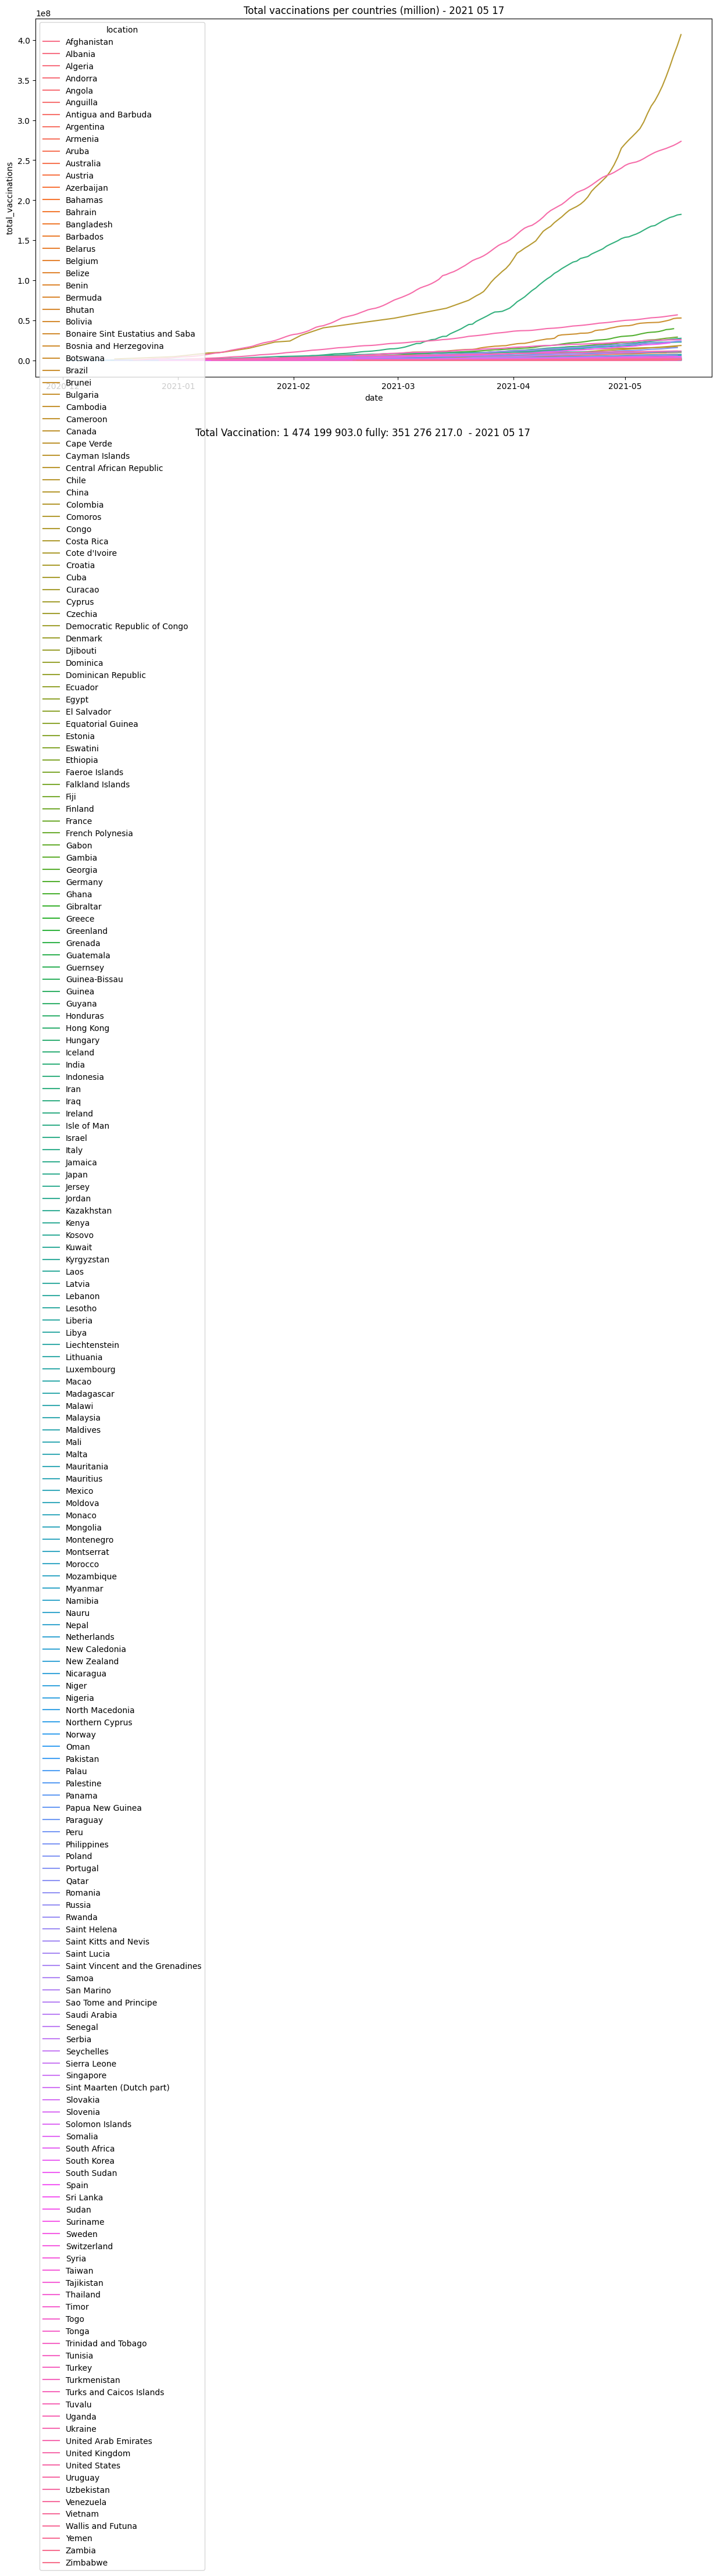

In [11]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Total vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle(titlestring + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [12]:
#plotLatestFullyCountries = plotLatestCountries[plotLatestCountries[people_fully_vaccinated] > 0]

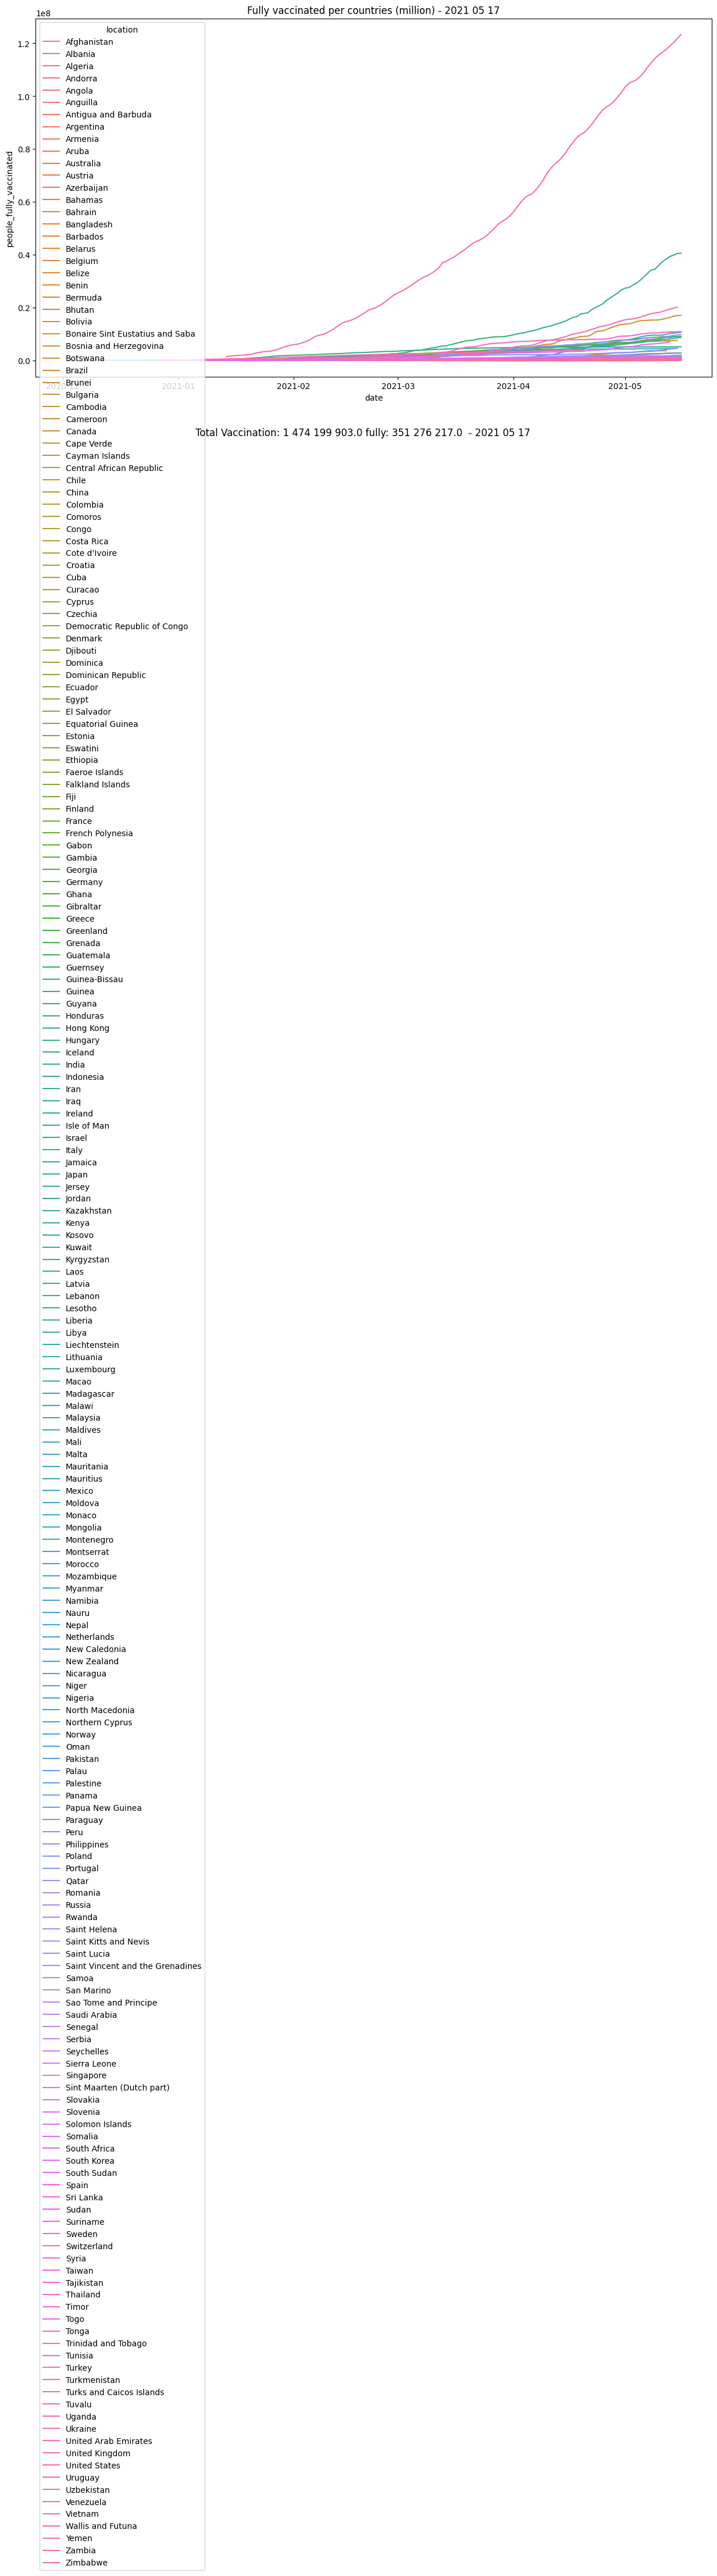

In [13]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="people_fully_vaccinated", hue="location" )
plt.title("Fully vaccinated per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle(titlestring + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/CoronaFully_Line.png',bbox_inches='tight')  
plt.show() 


In [14]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10630
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 10127 non-null  object        
 1   date                     10127 non-null  datetime64[ns]
 2   vaccine                  10127 non-null  object        
 3   source_url               10127 non-null  object        
 4   total_vaccinations       10038 non-null  float64       
 5   people_vaccinated        9293 non-null   float64       
 6   people_fully_vaccinated  8010 non-null   float64       
 7   iso_code                 10125 non-null  object        
 8   vaccines                 10125 non-null  object        
 9   last_observation_date    10125 non-null  object        
 10  source_name              10125 non-null  object        
 11  source_website           10125 non-null  object        
 12  _merge                   10127 n

In [15]:
allCountriesFiltered

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
0,Afghanistan,2021-02-22,Oxford/AstraZeneca,https://tolonews.com/index.php/health-170225,0.0,0.0,NaN,AFG,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",2021-05-11,World Health Organization,https://covid19.who.int/,both
1,Afghanistan,2021-02-28,Oxford/AstraZeneca,https://tolonews.com/index.php/health-170355,8200.0,8200.0,NaN,AFG,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",2021-05-11,World Health Organization,https://covid19.who.int/,both
2,Afghanistan,2021-03-16,Oxford/AstraZeneca,http://www.xinhuanet.com/english/asiapacific/2...,54000.0,54000.0,NaN,AFG,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",2021-05-11,World Health Organization,https://covid19.who.int/,both
3,Afghanistan,2021-04-07,Oxford/AstraZeneca,http://www.xinhuanet.com/english/asiapacific/2...,120000.0,120000.0,NaN,AFG,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",2021-05-11,World Health Organization,https://covid19.who.int/,both
4,Afghanistan,2021-04-22,Oxford/AstraZeneca,https://reliefweb.int/report/afghanistan/afgha...,240000.0,240000.0,NaN,AFG,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",2021-05-11,World Health Organization,https://covid19.who.int/,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10626,Zimbabwe,2021-05-12,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1392575941...,730365.0,549797.0,180568.0,ZWE,Sinopharm/Beijing,2021-05-16,Ministry of Health,https://twitter.com/MoHCCZim/status/1394026036...,both
10627,Zimbabwe,2021-05-13,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1392946476...,752020.0,559875.0,192145.0,ZWE,Sinopharm/Beijing,2021-05-16,Ministry of Health,https://twitter.com/MoHCCZim/status/1394026036...,both
10628,Zimbabwe,2021-05-14,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1393292518...,775241.0,571460.0,203781.0,ZWE,Sinopharm/Beijing,2021-05-16,Ministry of Health,https://twitter.com/MoHCCZim/status/1394026036...,both
10629,Zimbabwe,2021-05-15,Sinopharm/Beijing,https://twitter.com/MoHCCZim/status/1393639702...,793311.0,579769.0,213542.0,ZWE,Sinopharm/Beijing,2021-05-16,Ministry of Health,https://twitter.com/MoHCCZim/status/1394026036...,both


In [16]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


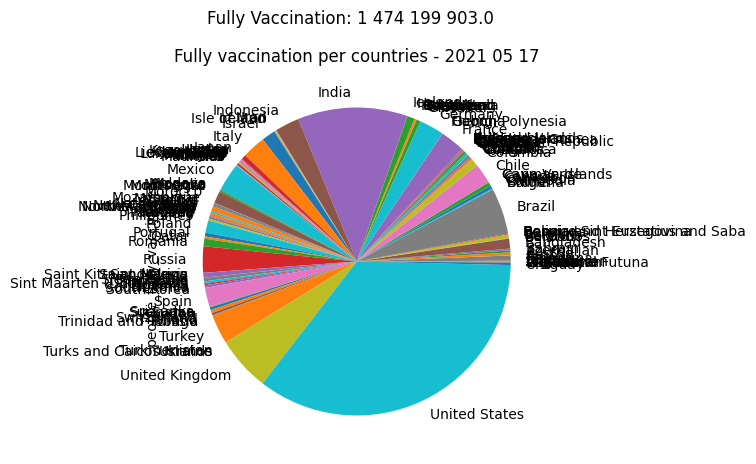

In [17]:
#people_fully_vaccinated
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["people_fully_vaccinated"].plot( y='location',kind = 'pie') 
plt.title("Fully vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Fully Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_FuVaccinationperCountry.png')  
plt.show() 


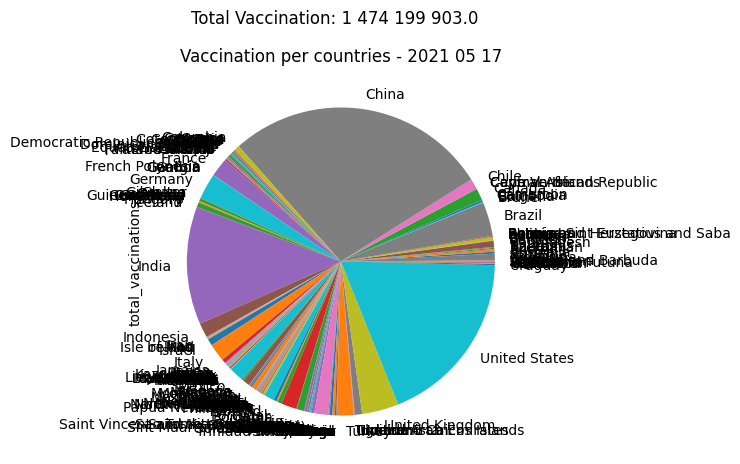

In [18]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [19]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccine,iso_code
location,,,,,
China,406938000.0,NaN,NaN,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",CHN
United States,273545207.0,157485596.0,123282685.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",USA
India,182251006.0,141764335.0,40486671.0,"Covaxin, Oxford/AstraZeneca",IND
United Kingdom,56677012.0,36573354.0,20103658.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",GBR
Brazil,52771668.0,35801333.0,16970335.0,"Pfizer/BioNTech, Oxford/AstraZeneca, Sinovac",BRA
...,...,...,...,...,...
Montserrat,1909.0,1293.0,616.0,Oxford/AstraZeneca,MSR
Central African Republic,667.0,667.0,0.0,"Covaxin, Oxford/AstraZeneca",CAF
Madagascar,609.0,609.0,0.0,Oxford/AstraZeneca,MDG


In [20]:
plotLatestCountries.shape

(208, 5)

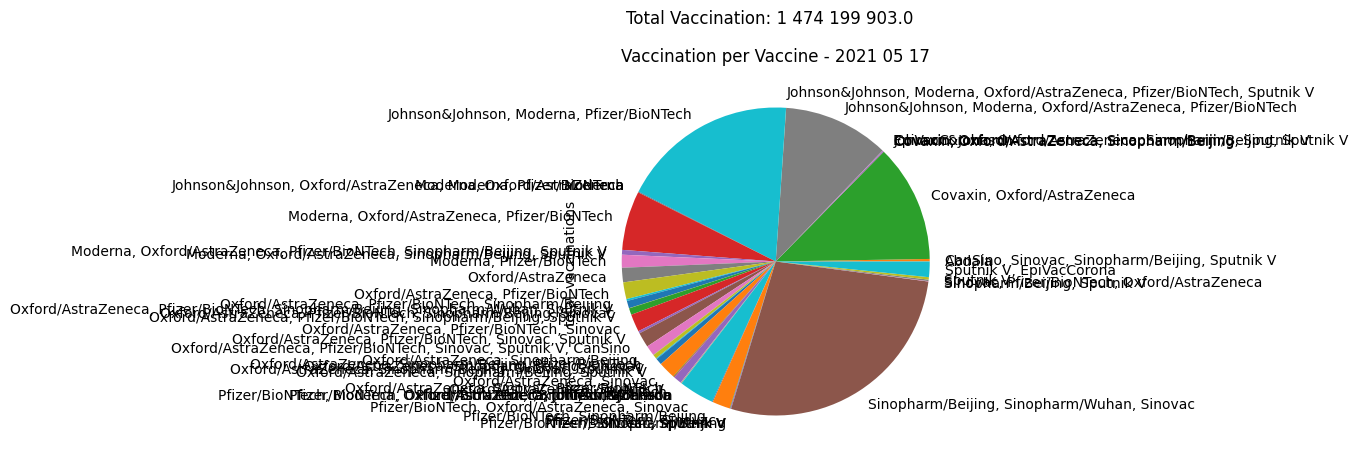

In [21]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [22]:
plotVaccine.sort_values(ascending=True)

vaccine
Moderna                                                                                    3109.0
Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V                                 38151.0
Pfizer/BioNTech, Sputnik V                                                                38766.0
EpiVacCorona, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V                            41993.0
Abdala                                                                                    70000.0
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V                 106559.0
Pfizer/BioNTech, Moderna                                                                 123637.0
Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing                                           264374.0
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac                          290500.0
Moderna, Oxford/AstraZeneca                                                              334482.0
Pfizer/BioNT

In [23]:
# Sweden have 10 000 doses....
#allCountries

In [24]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-05-17 13:47:44.441865
Time elapsed (hh:mm:ss.ms) 0:01:02.042153


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [25]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  196 non-null    object
 1   continent            196 non-null    object
 2   memberEU             196 non-null    object
 3   country              196 non-null    object
 4   qid                  196 non-null    object
 5   population           196 non-null    object
 6   ISO3166_1            196 non-null    object
 7   nominalGDPperCapita  1 non-null      object
 8   G20                  196 non-null    object
 9   IMF                  196 non-null    object
 10  genderH              196 non-null    object
dtypes: object(11)
memory usage: 17.0+ KB


In [26]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
176,http://www.wikidata.org/entity/Q1007,Africa,false,Guinea-Bissau,Q1007,1861283,GNB,None,false,false,male
121,http://www.wikidata.org/entity/Q1005,Africa,false,The Gambia,Q1005,2100568,GMB,None,false,false,male
9,http://www.wikidata.org/entity/Q214,Europe,true,Slovakia,Q214,5397036,SVK,None,false,false,male
109,http://www.wikidata.org/entity/Q686,Oceania,false,Vanuatu,Q686,276244,VUT,None,false,false,male
85,http://www.wikidata.org/entity/Q142,Europe,true,France,Q142,66628000,FRA,None,true,false,male


In [27]:
plotLatestCountries

,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccine,iso_code
location,,,,,
Afghanistan,504502.0,448878.0,55624.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",AFG
Albania,653330.0,448571.0,204759.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",ALB
Algeria,75000.0,NaN,NaN,Sputnik V,DZA
Andorra,31633.0,26931.0,4702.0,"Pfizer/BioNTech, Oxford/AstraZeneca",AND
Angola,626572.0,586377.0,40195.0,Oxford/AstraZeneca,AGO
...,...,...,...,...,...
Vietnam,977032.0,954520.0,22512.0,Oxford/AstraZeneca,VNM
Wallis and Futuna,5774.0,4286.0,1488.0,Oxford/AstraZeneca,WLF
Yemen,18555.0,18555.0,0.0,Oxford/AstraZeneca,YEM


In [28]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,people_vaccinated,people_fully_vaccinated,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,504502.0,448878.0,55624.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",AFG,http://www.wikidata.org/entity/Q889,Asia,false,Afghanistan,Q889,36643815,AFG,None,false,false,male,both
1,653330.0,448571.0,204759.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",ALB,http://www.wikidata.org/entity/Q222,Europe,false,Albania,Q222,3020209,ALB,None,false,false,male,both
2,75000.0,NaN,NaN,Sputnik V,DZA,http://www.wikidata.org/entity/Q262,Africa,false,Algeria,Q262,41318142,DZA,None,false,false,male,both
3,31633.0,26931.0,4702.0,"Pfizer/BioNTech, Oxford/AstraZeneca",AND,http://www.wikidata.org/entity/Q228,Europe,false,Andorra,Q228,76177,AND,None,false,false,male,both
4,626572.0,586377.0,40195.0,Oxford/AstraZeneca,AGO,http://www.wikidata.org/entity/Q916,Africa,false,Angola,Q916,29784193,AGO,None,false,false,male,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,250000.0,250000.0,NaN,Sputnik V,VEN,http://www.wikidata.org/entity/Q717,South America,false,Venezuela,Q717,28515829,VEN,None,false,false,male,both
179,977032.0,954520.0,22512.0,Oxford/AstraZeneca,VNM,http://www.wikidata.org/entity/Q881,Asia,false,Vietnam,Q881,94660000,VNM,None,false,false,male,both
180,18555.0,18555.0,0.0,Oxford/AstraZeneca,YEM,http://www.wikidata.org/entity/Q805,Asia,false,Yemen,Q805,28250420,YEM,None,false,false,male,both
181,107790.0,107790.0,0.0,Oxford/AstraZeneca,ZMB,http://www.wikidata.org/entity/Q953,Africa,false,Zambia,Q953,17094130,ZMB,None,false,true,male,both


In [29]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   total_vaccinations       182 non-null    float64 
 1   people_vaccinated        172 non-null    float64 
 2   people_fully_vaccinated  151 non-null    float64 
 3   vaccine                  183 non-null    object  
 4   iso_code                 183 non-null    object  
 5   cid                      183 non-null    object  
 6   continent                183 non-null    object  
 7   memberEU                 183 non-null    int64   
 8   country                  183 non-null    object  
 9   qid                      183 non-null    object  
 10  population               183 non-null    int64   
 11  ISO3166_1                183 non-null    object  
 12  nominalGDPperCapita      1 non-null      float64 
 13  G20                      183 non-null    int64   
 14  IMF       

In [30]:
#CountriesData

In [31]:
CountriesData['Country'] = CountriesData.index

In [32]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
people_vaccinated                  0.989435
people_fully_vaccinated            0.962517
memberEU                          -0.026010
population                         0.903863
nominalGDPperCapita                     NaN
G20                                0.510316
IMF                                0.013606
genderFlag                         0.039556
Country                           -0.057908
vaccinations_population_percent    0.133080
Name: total_vaccinations, dtype: float64

In [33]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.133080
people_vaccinated                  0.198743
people_fully_vaccinated            0.228001
memberEU                           0.329543
population                        -0.004606
nominalGDPperCapita                     NaN
G20                                0.110363
IMF                                0.016442
genderFlag                        -0.151024
Country                            0.028569
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [34]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


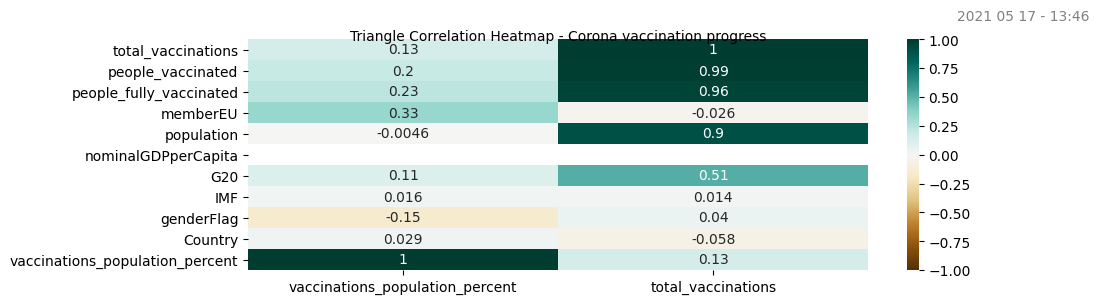

In [35]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [36]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,G20,vaccinations_population_percent,IMF,total_vaccinations,memberEU,continent,population,country
143,0,136.752814,0,131068.0,0,Africa,95843,Seychelles
173,0,121.814812,0,11450769.0,0,Asia,9400145,United Arab Emirates
138,0,116.065868,0,38766.0,0,Europe,33400,San Marino
77,0,115.794897,0,10529230.0,0,Asia,9093000,Israel
98,0,102.190315,0,445887.0,0,Asia,436330,Maldives
...,...,...,...,...,...,...,...,...
30,0,0.014316,0,667.0,0,Africa,4659080,Central African Republic
159,0,0.013514,0,2500.0,0,Asia,18499181,Syria
43,0,0.009731,0,8446.0,0,Africa,86790567,Democratic Republic of the Congo
95,0,0.002382,0,609.0,0,Africa,25570895,Madagascar


## Vaccination numbers % of population

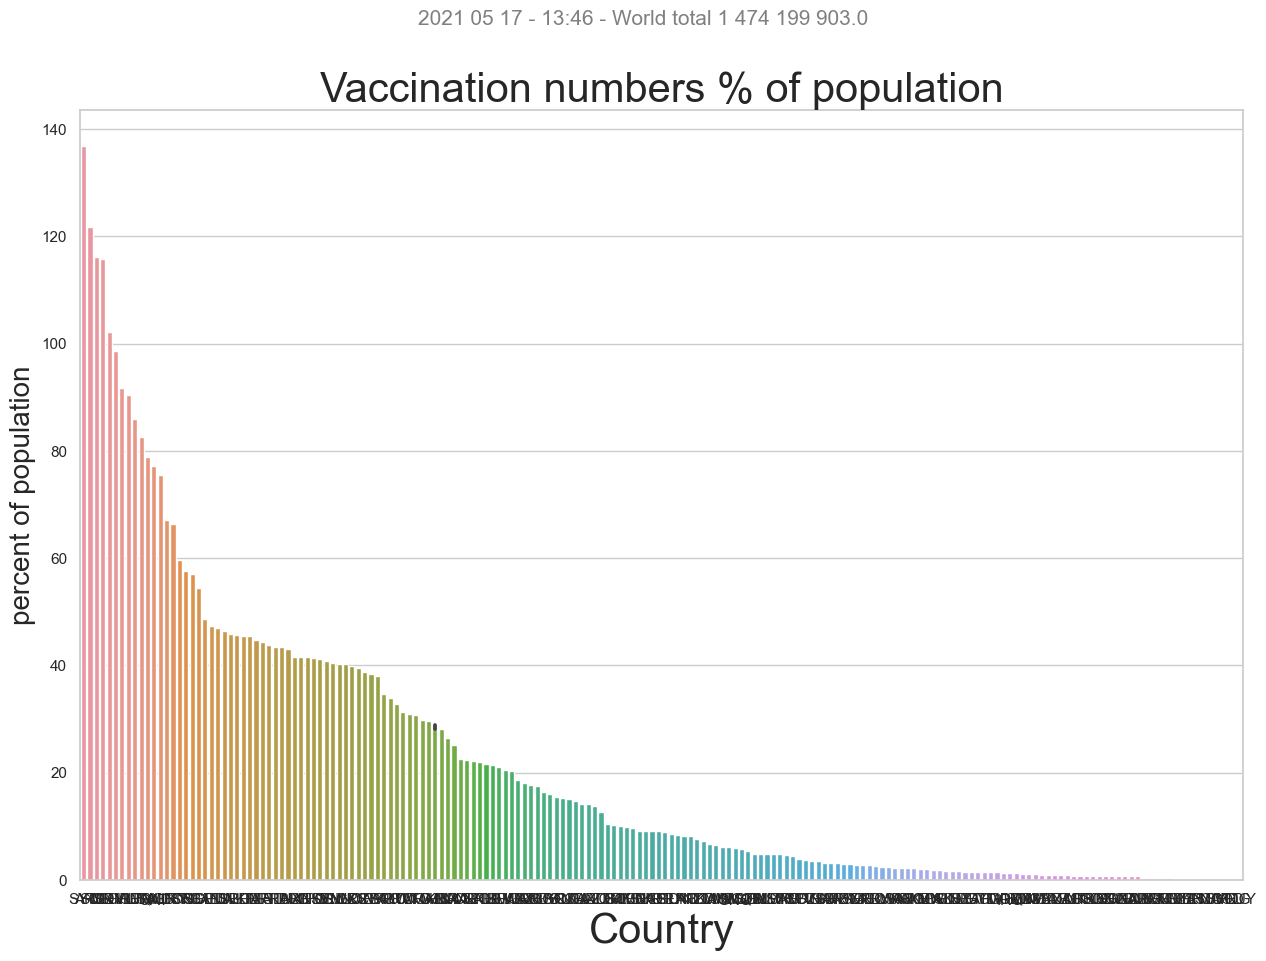

In [37]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

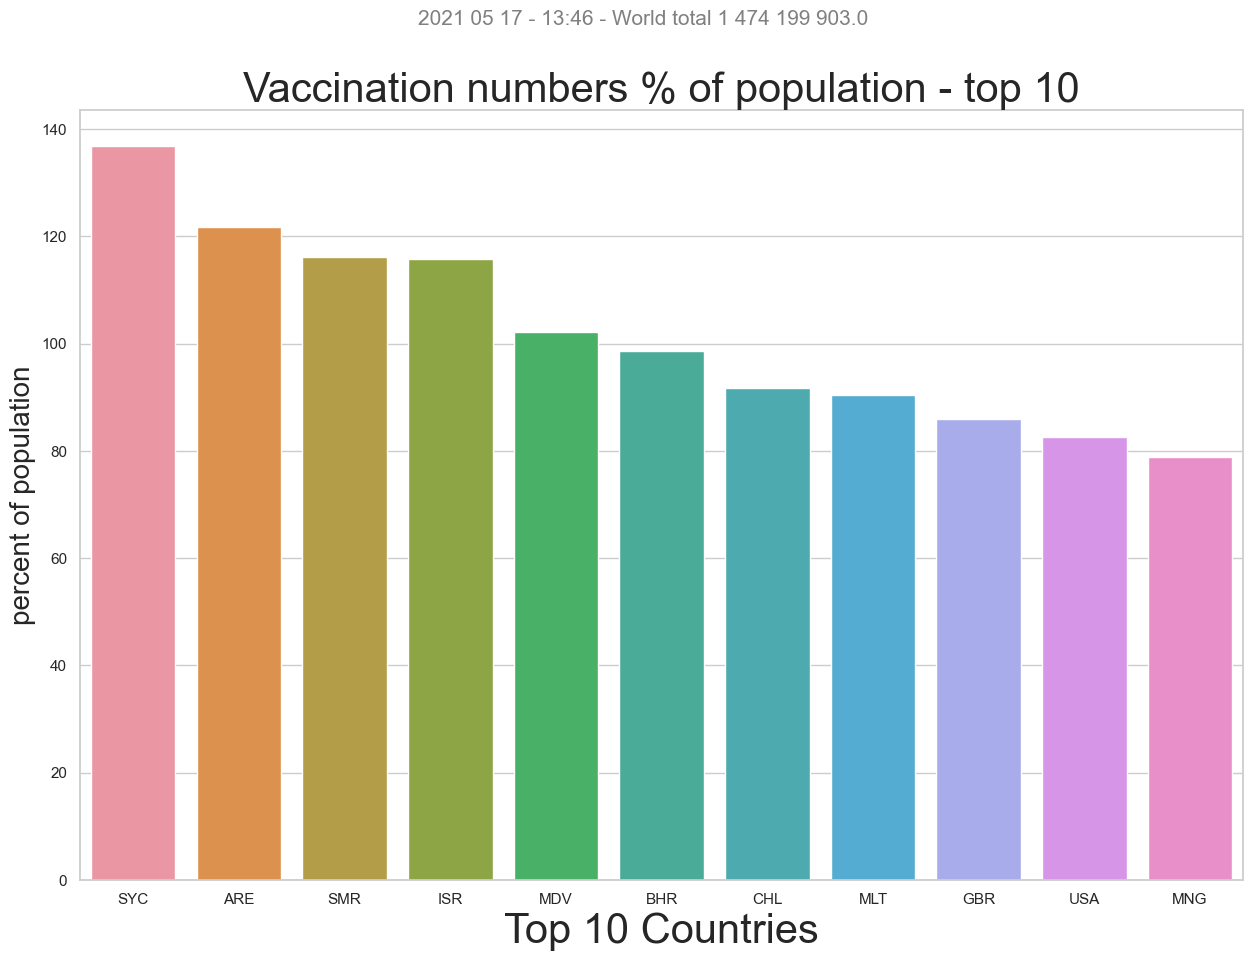

In [38]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

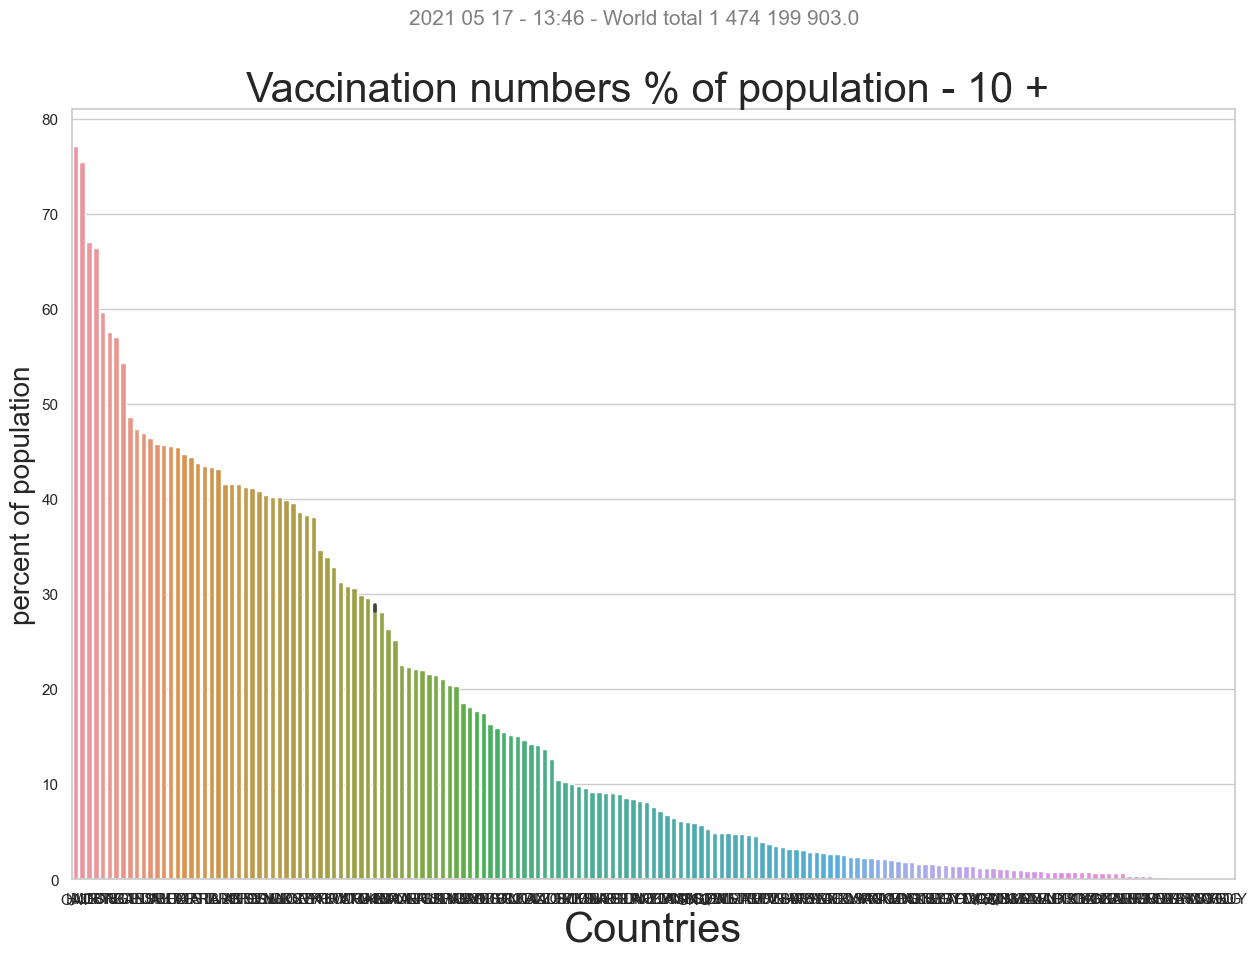

In [39]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


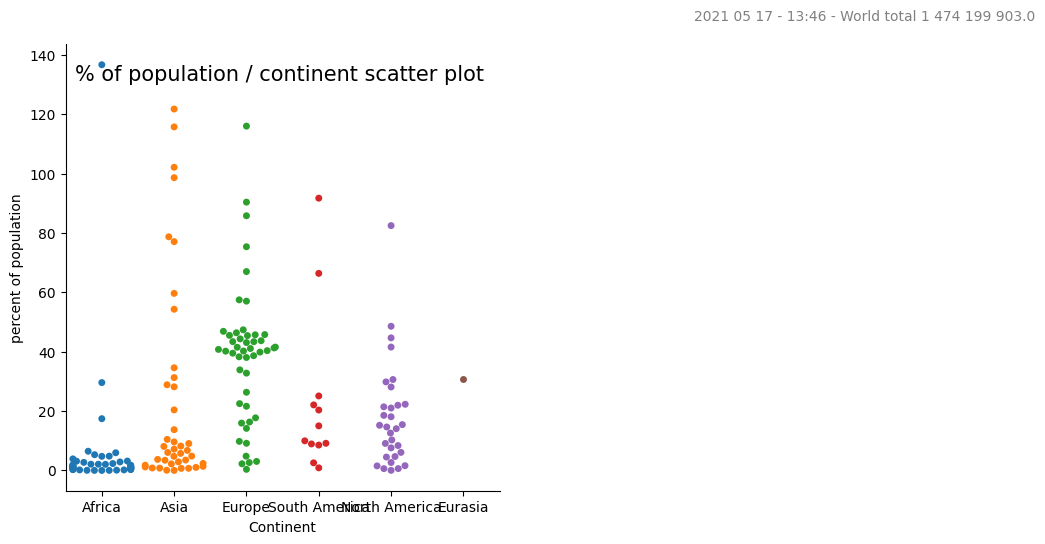

In [40]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

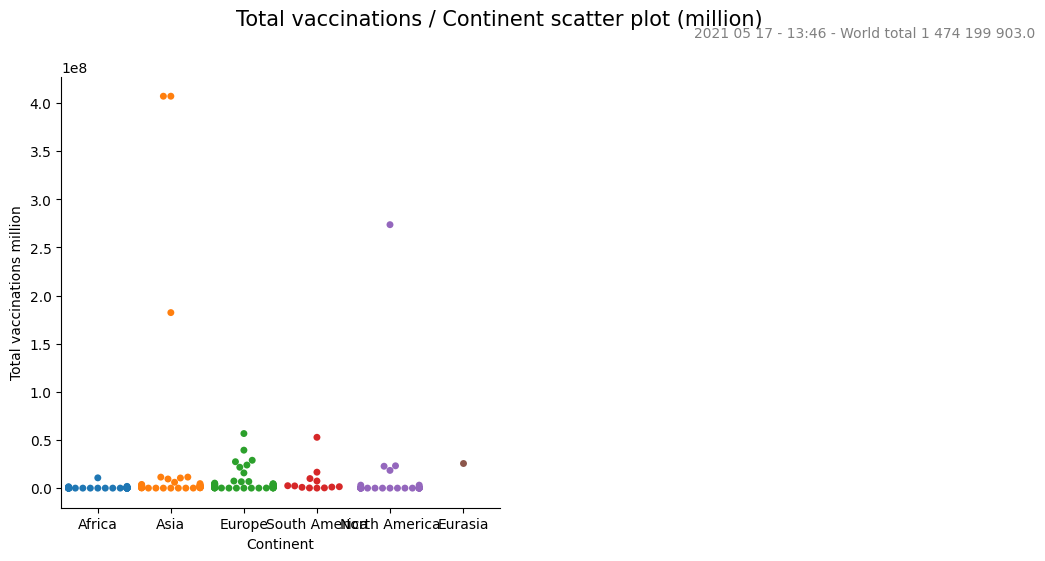

In [41]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [42]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


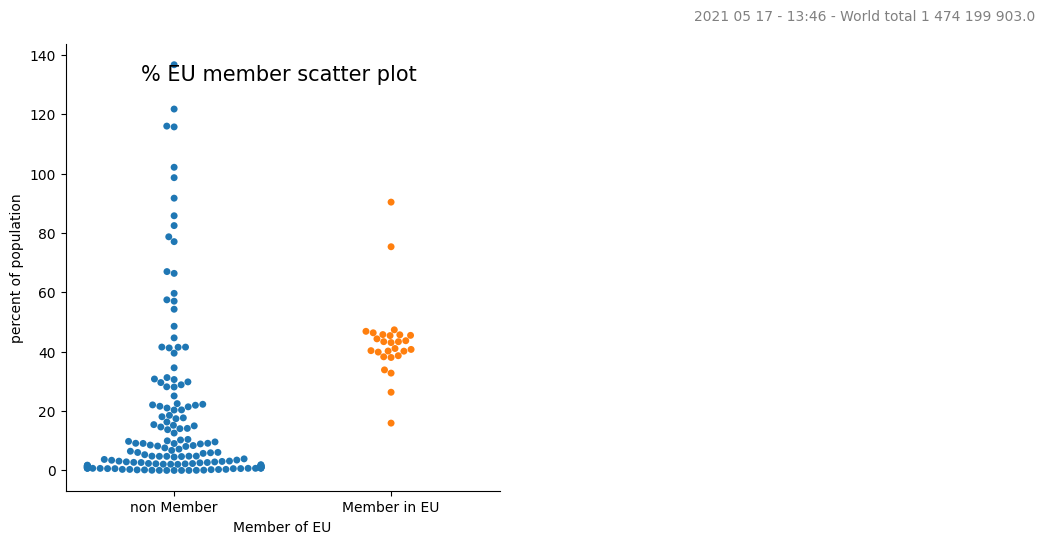

In [43]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


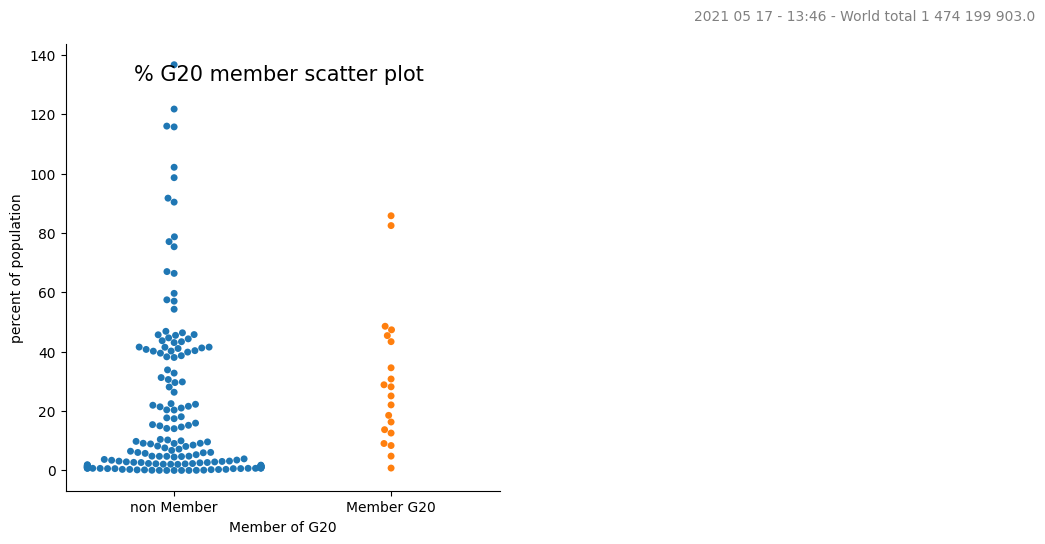

In [44]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


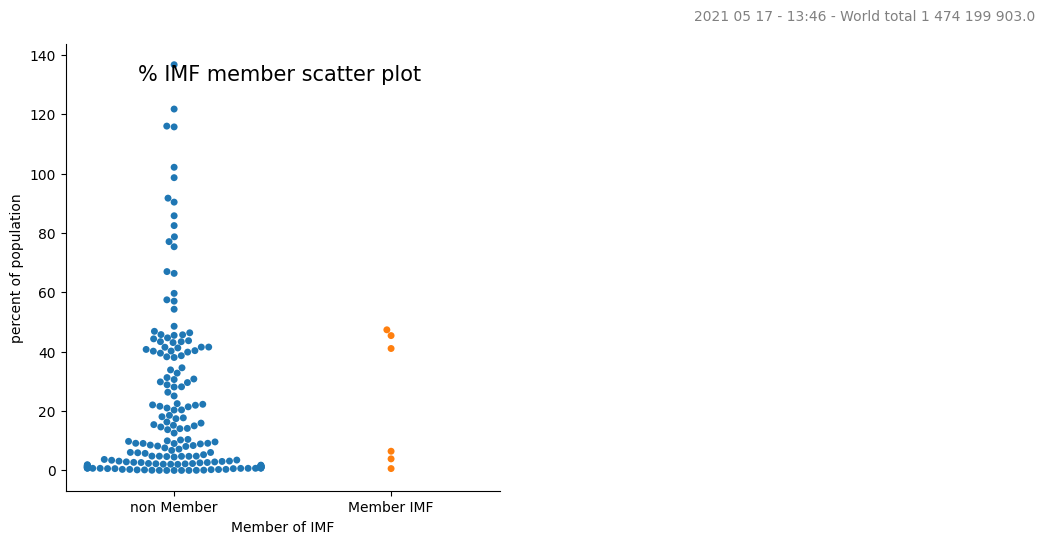

In [45]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [46]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


1 474 199 903.0 (208, 5) 294 242 744.0


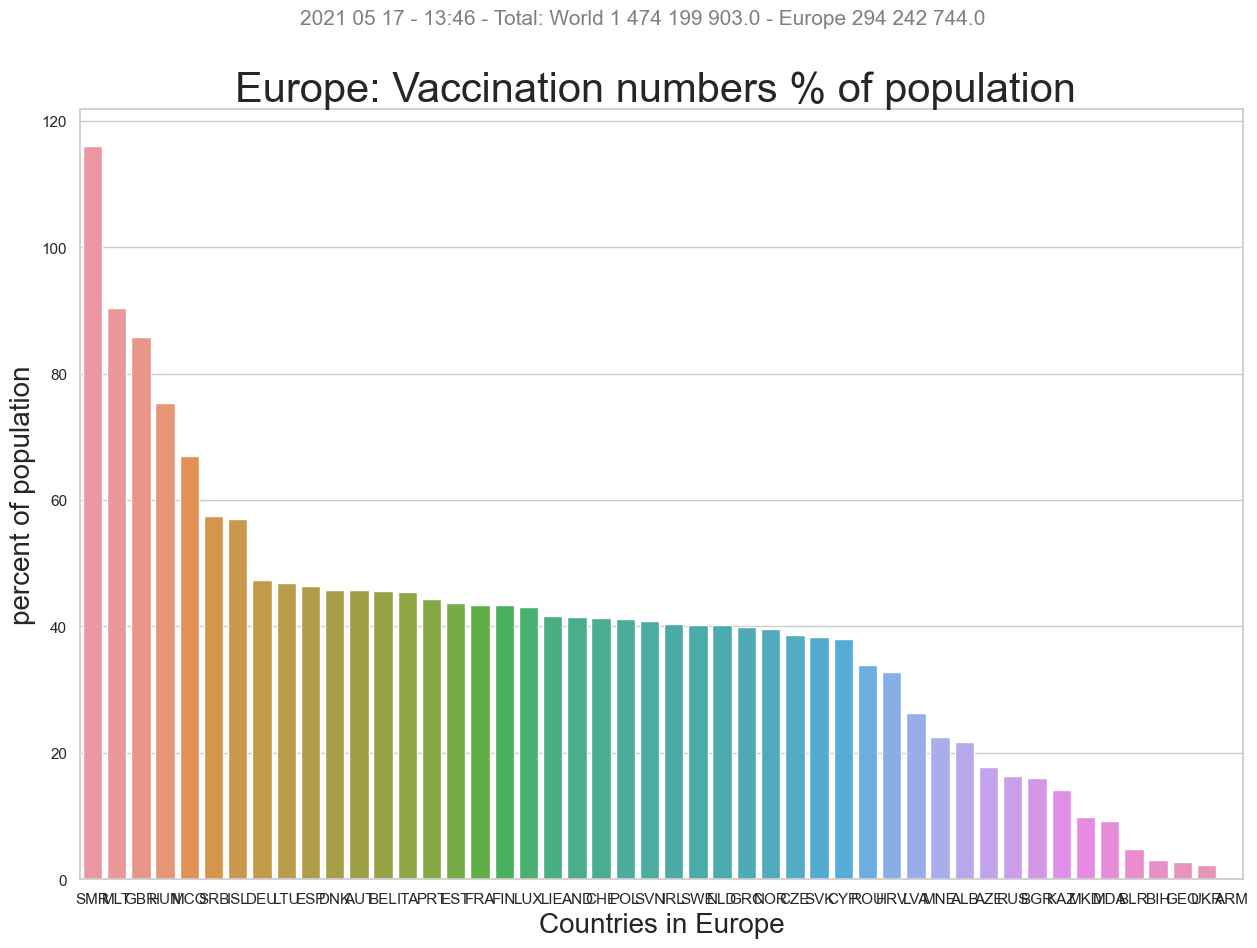

In [47]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [48]:
#CountriesDataEurope

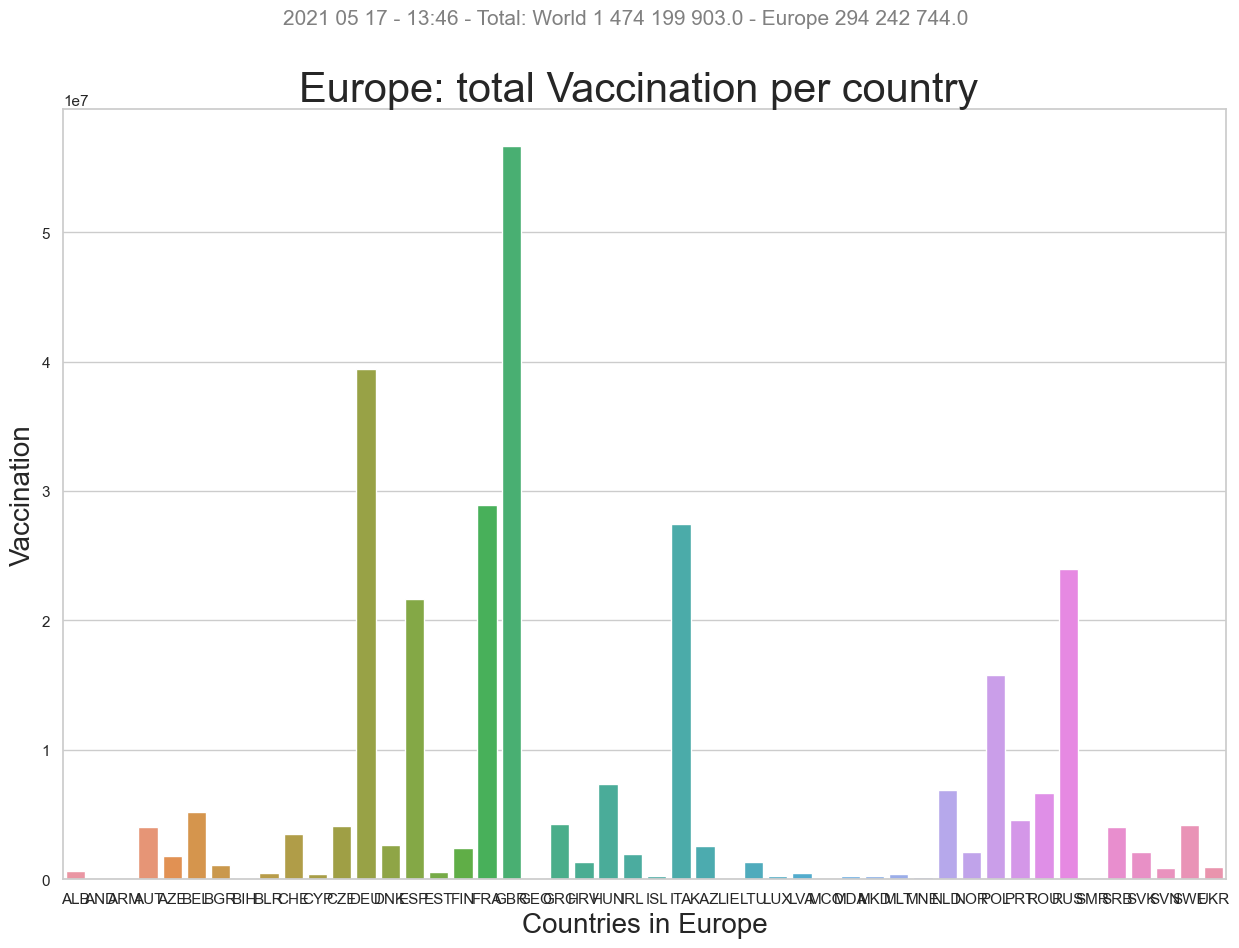

In [49]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [50]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,ISO3166_1,memberEU,vaccinations_population_percent,country_x,head_gender,total_vaccinations
31,ALB,non Member,21.631947,Albania,male,653330.0
23,AND,non Member,41.525657,Andorra,male,31633.0
19,ARM,non Member,0.366053,Armenia,male,10727.0
36,AUT,Member in EU,45.721842,Austria,male,4027734.0
25,AZE,non Member,17.723848,Azerbaijan,male,1795049.0
34,BEL,Member in EU,45.533751,Belgium,male,5205148.0
9,BGR,Member in EU,15.953354,Bulgaria,male,1116741.0
0,BIH,non Member,3.035742,Bosnia and Herzegovina,male,106464.0
6,BLR,non Member,4.813017,Belarus,male,450000.0
45,CHE,non Member,41.291283,Switzerland,male,3495727.0


## All countries on continent Europe

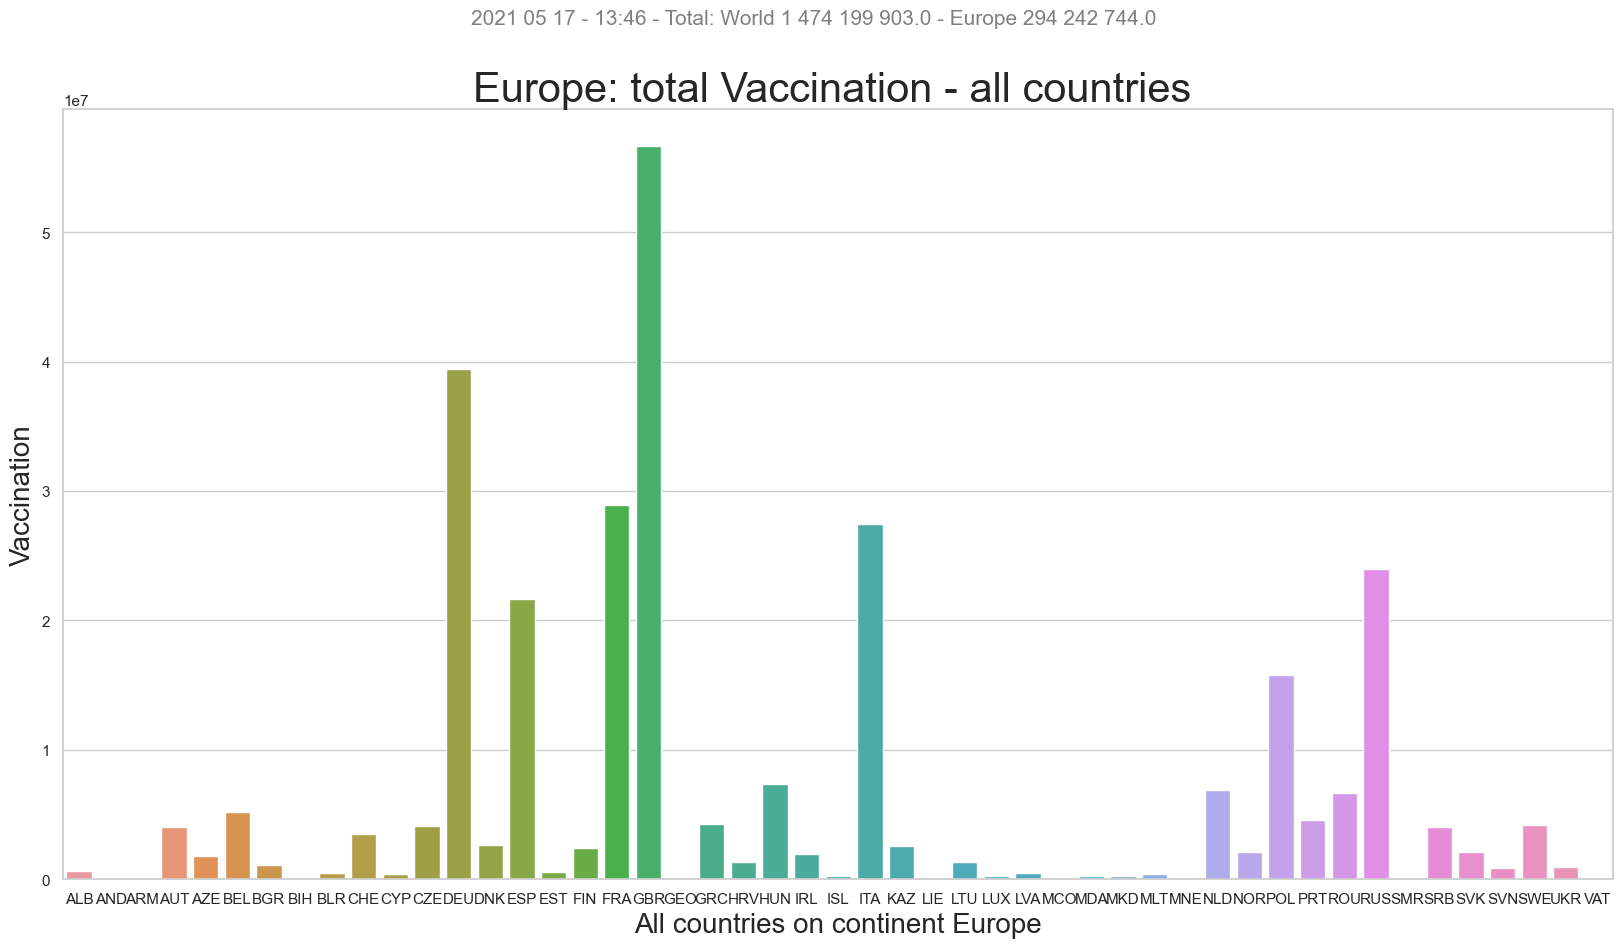

In [51]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [52]:
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 31 to 5
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ISO3166_1                        49 non-null     object 
 1   memberEU                         49 non-null     object 
 2   vaccinations_population_percent  49 non-null     float64
 3   country_x                        49 non-null     object 
 4   head_gender                      49 non-null     object 
 5   total_vaccinations               49 non-null     float64
dtypes: float64(2), object(4)
memory usage: 3.7+ KB


In [53]:
CountriesDataEuropeAll


,ISO3166_1,memberEU,vaccinations_population_percent,country_x,head_gender,total_vaccinations
31,ALB,non Member,21.631947,Albania,male,653330.0
23,AND,non Member,41.525657,Andorra,male,31633.0
19,ARM,non Member,0.366053,Armenia,male,10727.0
36,AUT,Member in EU,45.721842,Austria,male,4027734.0
25,AZE,non Member,17.723848,Azerbaijan,male,1795049.0
34,BEL,Member in EU,45.533751,Belgium,male,5205148.0
9,BGR,Member in EU,15.953354,Bulgaria,male,1116741.0
0,BIH,non Member,3.035742,Bosnia and Herzegovina,male,106464.0
6,BLR,non Member,4.813017,Belarus,male,450000.0
45,CHE,non Member,41.291283,Switzerland,male,3495727.0


### Countries in EU

In [54]:
#CountriesDataEuropeEU[CountriesDataEuropeEU["ISO3166_1"] == "RUS"]
#CountriesDataEuropeEU
CountriesDataEuropeAll.rename(columns = {'country_x': 'country'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'ISO3166_1': 'ISO3166-1'}, inplace = True)

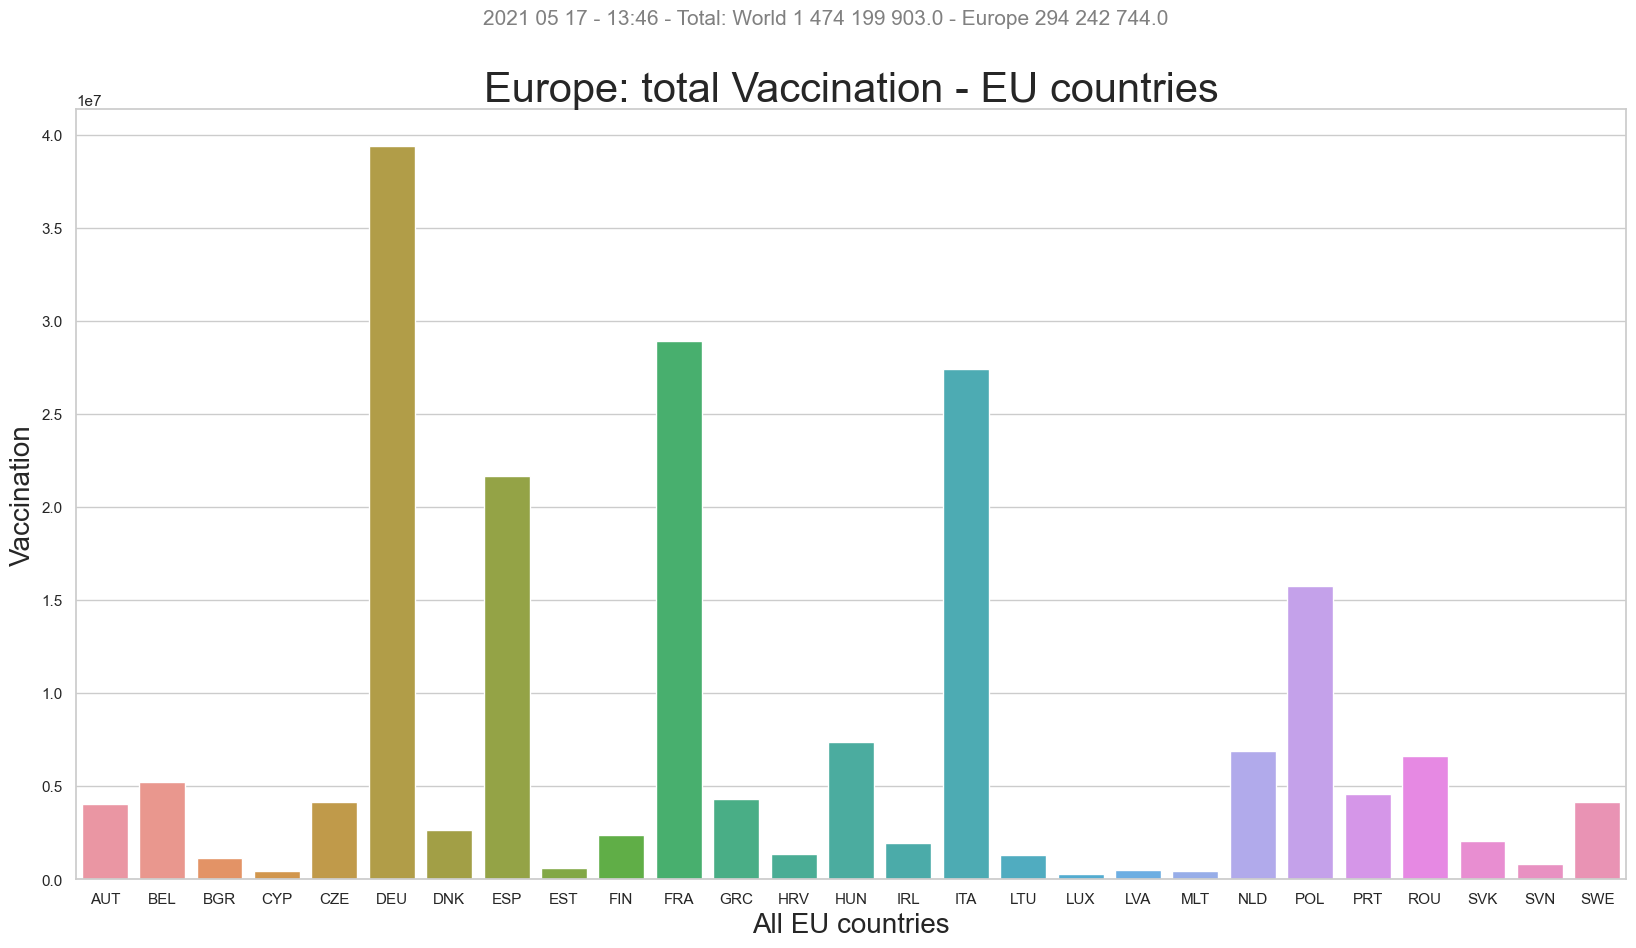

In [55]:
CountriesDataEuropeEU = CountriesDataEuropeAll[CountriesDataEuropeAll["memberEU"] == "Member in EU"]

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "total_vaccinations", data=CountriesDataEuropeEU). \
            set_title("Europe: total Vaccination - EU countries", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
#plt.annotate('actual group', xy=(x+0.2,y), xytext=(x+0.3, 300),
#             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
#for p in ax.patches:
#    print(p)

plt.savefig("images/EU_VaccinationperCountry.png",bbox_inches="tight")
plt.show()

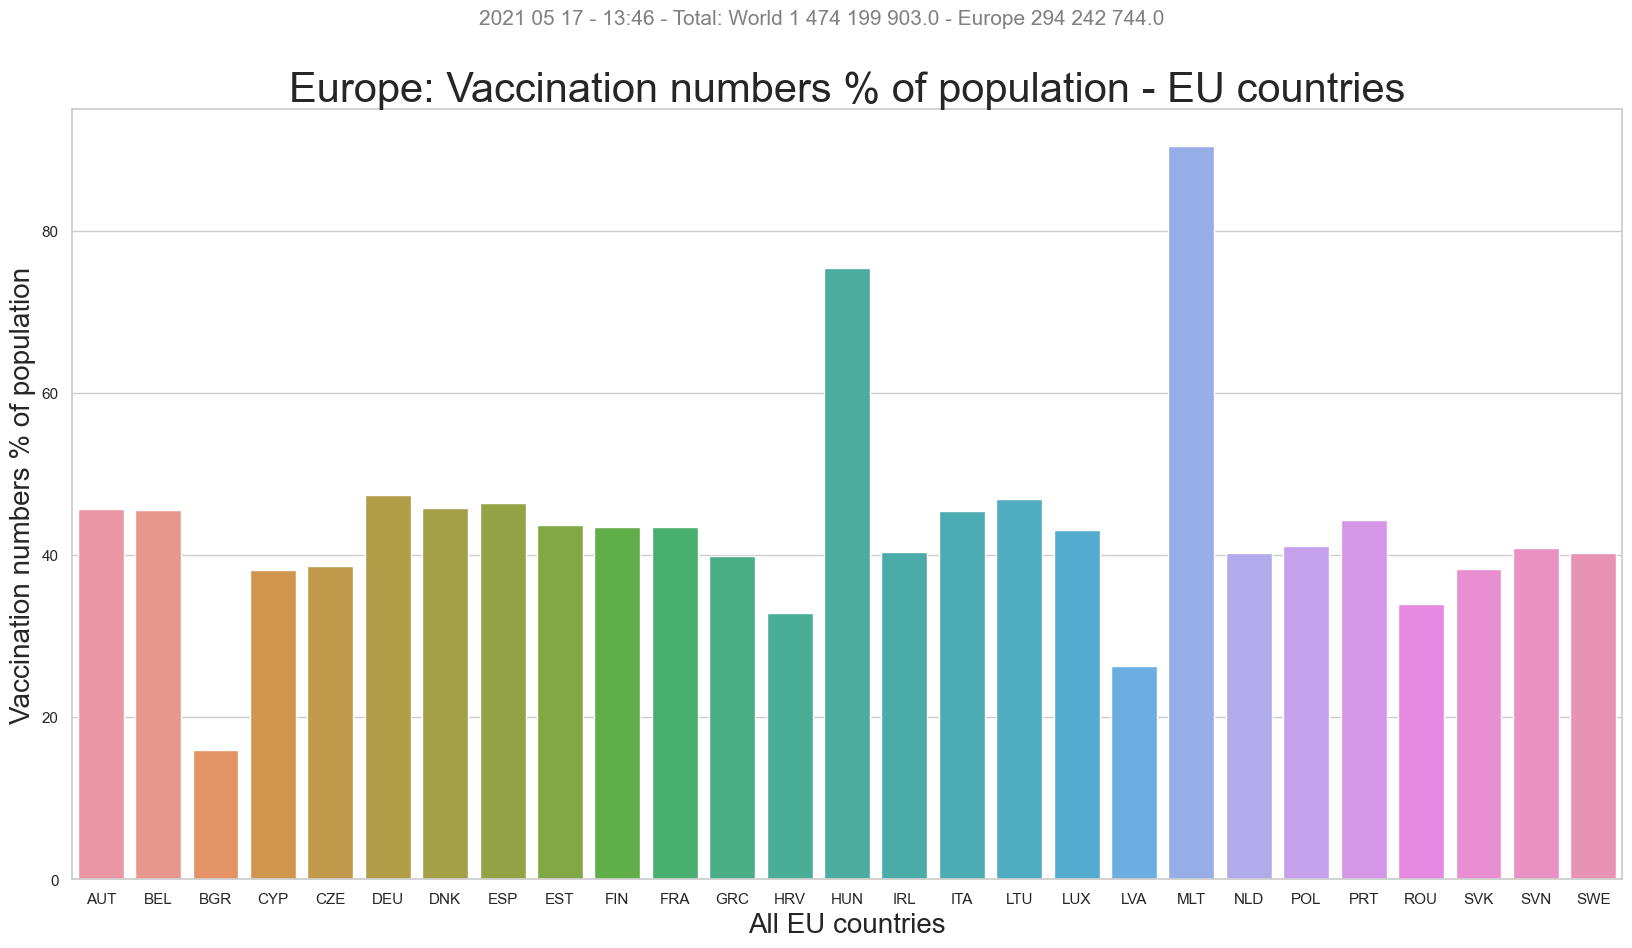

In [56]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "vaccinations_population_percent", data=CountriesDataEuropeEU). \
            set_title("Europe: Vaccination numbers % of population - EU countries", \
                      fontsize=30)
style = dict(size=10, color='gray')

plt.ylabel("Vaccination numbers % of population",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/EU_PercentVaccinationperCountry.png",bbox_inches="tight")
plt.show()

In [57]:
CountriesDataEuropeEU
#WDpopulationEuropeEU

,ISO3166-1,memberEU,vaccinations_population_percent,country,head_gender,total_vaccinations
36,AUT,Member in EU,45.721842,Austria,male,4027734.0
34,BEL,Member in EU,45.533751,Belgium,male,5205148.0
9,BGR,Member in EU,15.953354,Bulgaria,male,1116741.0
29,CYP,Member in EU,38.079473,Cyprus,male,434550.0
1,CZE,Member in EU,38.675979,Czech Republic,male,4139017.0
24,DEU,Member in EU,47.401893,Germany,female,39414342.0
37,DNK,Member in EU,45.796104,Denmark,female,2668751.0
12,ESP,Member in EU,46.399096,Spain,male,21683707.0
39,EST,Member in EU,43.727299,Estonia,female,579308.0
41,FIN,Member in EU,43.394607,Finland,female,2387156.0


### Countries in EU not delivering Vaccination statistics

In [58]:
CountriesDataEuropeAll[(CountriesDataEuropeAll["memberEU"] == "Member in EU") & \
(CountriesDataEuropeAll["total_vaccinations"] == 0 )][{"total_vaccinations","country","ISO3166-1","memberEU"}]

,ISO3166-1,memberEU,total_vaccinations,country


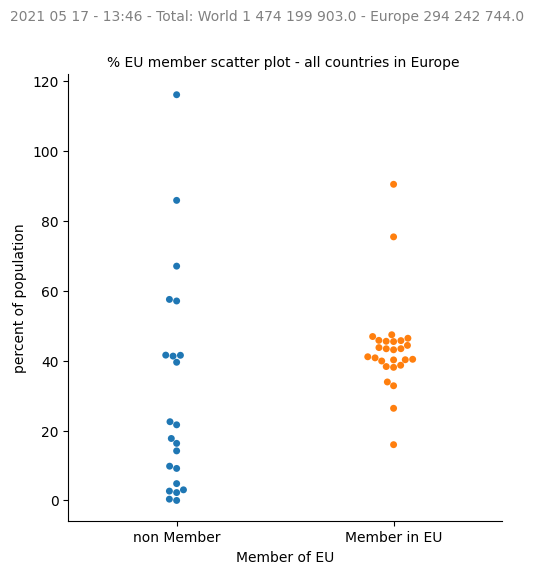

In [59]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [60]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 31 to 5
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ISO3166-1                        49 non-null     object 
 1   memberEU                         49 non-null     object 
 2   vaccinations_population_percent  49 non-null     float64
 3   country                          49 non-null     object 
 4   head_gender                      49 non-null     object 
 5   total_vaccinations               49 non-null     float64
dtypes: float64(2), object(4)
memory usage: 3.7+ KB


In [61]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

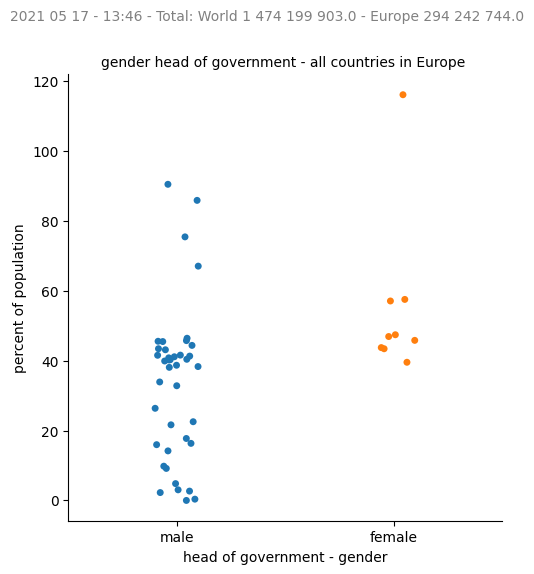

In [62]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

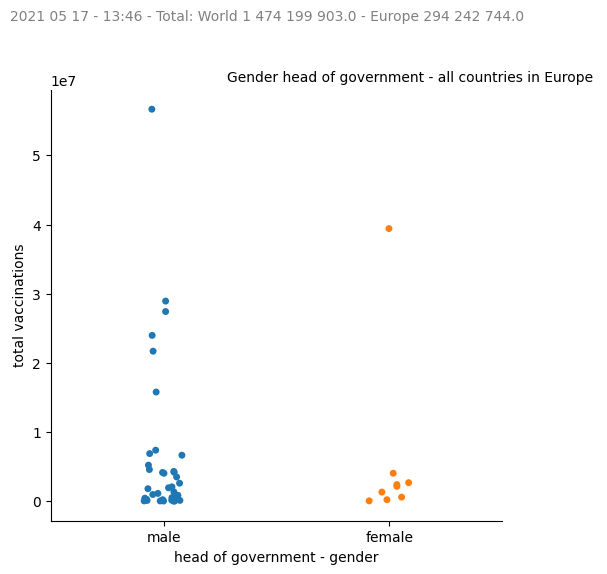

In [63]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [64]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

1 474 199 903.0 (208, 5) 294 242 744.0 (48, 23)


In [65]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-05-17 13:48:36.763604
Time elapsed (hh:mm:ss.ms) 0:01:54.364194


In [66]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)